# Задача

В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

## Вам необходимо:
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

## Ресурсы:
[Данные для скачивания](https://drive.google.com/drive/folders/1k0k3d-WO9kYqp0q9QG1WcmLn6mWWs0Zd?usp=sharing)

**Результат прислать в формате ссылки на Github с ноутбуком**

## ОПИСАНИЕ ДАННЫХ
Для выполнения задания вам необходимы файлы `train.csv`, `lectures.csv`, `questions.csv`.

**`TRAIN.CSV`**
+ `row_id`: (int64) ID код строки.

+ `timestamp`: (int64) the time in milliseconds between this user interaction and the first event completion from that user
    > время в миллисекундах между взаимодействием пользователя и первым событием завершения от этого пользователя (видимо, время потраченное студентом на тест/лекцию)

+ `user_id`: (int32) ID code for the user. - ID студента

+ `content_id`: (int16) ID code for the user interaction
    > ID код взаимодействия с пользователем

+ `content_type_id`: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.
    > 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции.

+ `task_container_id`: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.
    > Код идентификатора для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения для любого из них. Все эти три вопроса будут иметь общий task_container_id.

+ `user_answer`: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
    > ответ пользователя на вопрос, если таковой имеется. Читать -1 как null для лекций.

+ `answered_correctly`: (int8) if the user responded correctly. Read -1 as null, for lectures.
    > если пользователь ответил правильно. Читать -1 как null для лекций.

+ `prior_question_elapsed_time`: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.
    > Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов или лекции пользователя. Обратите внимание, что время — это среднее время, которое потребовалось пользователю для решения каждого вопроса в предыдущем пакете.
  
+ `prior_question_had_explanation`: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.
    > Увидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение является общим для одного пакета вопросов и равно нулю для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста на вступление, где он не получал никакой обратной связи.
 

**`QUESTIONS.CSV`: METADATA FOR THE QUESTIONS POSED TO USERS.**
**`QUESTIONS.CSV`: МЕТАДАННЫЕ ВОПРОСОВ, ЗАДАННЫХ ПОЛЬЗОВАТЕЛЯМ.**
+ `question_id`: foreign key for the train/test content_id column, when the content type is question (0).
    > внешний ключ для обучающего/тестового столбца `content_id`, когда тип контента - вопрос (0).

+ `bundle_id`: code for which questions are served together.
    > код, по которому вопросы подаются вместе

+ `correct_answer`: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
    > ответ на вопрос. Можно сравнить с train `user_answer` столбцом, чтобы проверить, был ли пользователь прав.

+ `part`: the relevant section of the TOEIC test.
    > соответствующий раздел теста TOEIC

+ `tags`: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.
    > один или несколько подробных кодов тегов для вопроса. Значение тегов не будет предоставлено, но этих кодов достаточно для кластеризации вопросов.

**`LECTURES.CSV`: METADATA FOR THE LECTURES WATCHED BY USERS AS THEY PROGRESS IN THEIR EDUCATION.**
**`LECTURES.CSV`: МЕТАДАННЫЕ ЛЕКЦИЙ, ПРОСМОТРЕННЫХ ПОЛЬЗОВАТЕЛЯМИ ПО МЕРЕ ПРОДВИЖЕНИЯ СВОЕГО ОБРАЗОВАНИЯ.**

+ `lecture_id`: foreign key for the train/test content_id column, when the content type is lecture (1).
    > внешний ключ для обучающего/тестового столбца content_id, когда типом контента является лекция (1).
  
+ `part`: top level category code for the lecture.
    > код категории верхнего уровня для лекции.

+ `tag`: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.
    > единые тег-коды лекции. Значение тегов не будет предоставлено, но эти коды достаточны для кластеризации лекций вместе.

+ `type_of`: brief description of the core purpose of the lecture.
    > краткое описание основной цели лекции

## КРИТЕРИИ ОЦЕНКИ РЕЗУЛЬТАТА
**Критерий 1**. Качество проведенного анализа
1. Проанализированы все возможные признаки - 50 баллов
2. Проанализировано большинство признаков - 40 баллов
3. Для анализа использованы только базовые признаки - 25 баллов

**Критерий 2**. Качество кода
1. Код хорошо читается и задокументирован, соответствует pep-8 - 50 баллов
2. Код в целом понятен и хорошо читается - 40 баллов
3. Код работоспособный - 25 баллов


## В каких плоскостях можно проанализировать имеющиеся данные
**Таблица TRAIN**
1. `user_id` - будем использовать для подсчета числа студентов в каждой группе анализа
2. `timestamp` - зависимость от времени, потраченного студентом на прохождение теста или изучение лекций
3. `content_type_id` - зависимость от того, смотрел пользователь лекции или нет, как много лекций смотрел и сколько времени потратил на все лекции или какую-то тему
4. `task_container_id` - насколько хорошо пользователи справлялись с комплексными вопросами
5. `user_answer` таблицы train и `correct_answer` таблицы questions_data можно удалить, поскольку нас интересует не сам ответ, а его правильность, заданная столбцом `answered_correctly` таблицы train (проверить)
6. `prior_question_elapsed_time` - оценка по признаку скорости ответов на пакеты вопросов
7. `prior_question_had_explanation` - оценка зависимости успеваемости от обратной связи

**Таблица QUESTIONS**
1. `question_id` - через него пришиваем справа к таблице train параметры вопросов (правильные ответы, категорию, теги) для анализа по содержимому лекций

**Таблица QUESTIONS**
1. `lecture_id` - через него пришиваем справа к таблице train параметры лекций (категории, теги, типы) для анализа по содержимому лекций

In [2]:
import pandas as pd

# Считаем данные из файлов и сохраним в переменные
train_data = pd.read_csv('data/train.csv')
questions_data = pd.read_csv('data/questions.csv')
lectures_data = pd.read_csv('data/lectures.csv')

In [3]:
train_data

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


Данные считывались 37 секунд. Многовато, с учетом, что работать с ними придется много. Посмотрим как можно их "сжать" или справедливо семплировать.

## 1. Предобработка данных

In [4]:
# Самая тяжелая таблица на 101 230 332 строк и весом 7.5Gb
# Проверим размеры таблиц и типы даных в них
display(train_data.info())
display(questions_data.info())
display(lectures_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


None

### Создадим копии считанных данных для дальнейшей работы с ними

In [5]:
train = train_data.copy()
questions = questions_data.copy()
lectures = lectures_data.copy()

In [6]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


Т.к. CSV файл не хранит данные о типах данных, то при чтении из файла мы получили типы, не соответствующие описанию. Приведем в соответствие. Это поможет сократить объем таблиц.

### 1.2 Приведение типов

In [7]:
# По умолчанию из CSV для численных данных установился тип INT64
# Приведем типы ячеек в более "компактные" согласно описанию данных - без порчи данных в ячейках
train['user_id'] = train['user_id'].astype('int32')
train['content_id'] = train['content_id'].astype('int16')
train['content_type_id'] = train['content_type_id'].astype('int8')
train['task_container_id'] = train['task_container_id'].astype('int16')
train['user_answer'] = train['user_answer'].astype('int8')
train['answered_correctly'] = train['answered_correctly'].astype('int8')
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].astype('float32')
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('bool')

# И посмотрим, что получилось и как изменился объем данных таблицы
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  bool   
dtypes: bool(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.0 GB


Неплохо. Объем таблицы train сократился в 2,5 раза. Проделаем ту же работу с 2 другими таблицами

In [8]:
# Приведем типы для таблицы questions, для начала проверив максимальные значения в столбцах
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [9]:
# Видим, что столбцы question_id и bundle_id можно привести к int16, а correct_answer и part к int8
questions['question_id'] = questions['question_id'].astype('int16')
questions['bundle_id'] = questions['bundle_id'].astype('int16')
questions['correct_answer'] = questions['correct_answer'].astype('int8')
questions['part'] = questions['part'].astype('int8')

# И проверим что показатели таблицы не изменились
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [10]:
# Проделаем ту же работу с таблицей лекций
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [11]:
# Видим, что столбец lecture_id и tag можно привести к int16, а part к int8
lectures['lecture_id'] = lectures['lecture_id'].astype('int16')
lectures['tag'] = lectures['tag'].astype('int16')
lectures['part'] = lectures['part'].astype('int8')

# И проверим что показатели таблицы не изменились
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [12]:
# Посмотрим, насколько уменьшился размер таблицы (в разы)
display(train.info())
display(lectures.info())
display(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  bool   
dtypes: bool(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.0 GB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


None

### 1.2 Предварительный анализ
Успеваемость студентов основана на их правильных оценках на тестовые вопросы. Каждый студент мог пройти разное количество тестов. И чтобы не сравнивать студента со 100 пройденными тестами с теми, кто прошел 3-4 теста, посмотрим как распределяются по студентам количество отвеченных вопросов.

,user_id,answered_correctly
0,801103753,17609
1,1478712595,16842
2,455973631,16640
3,1842816145,16533
4,1743444187,16424
...,...,...
393651,346289863,1
393652,522833851,1
393653,1621908707,1
393654,998428645,1


count    393656.000000
mean        252.177790
std         734.721108
min           1.000000
25%          30.000000
50%          40.000000
75%         154.000000
max       17609.000000
Name: answered_correctly, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14ae58e60>,
 'caps': [<matplotlib.lines.Line2D at 0x14ae59490>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ae58b60>],
 'medians': [<matplotlib.lines.Line2D at 0x14ae59a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ae59d60>],
 'means': []}

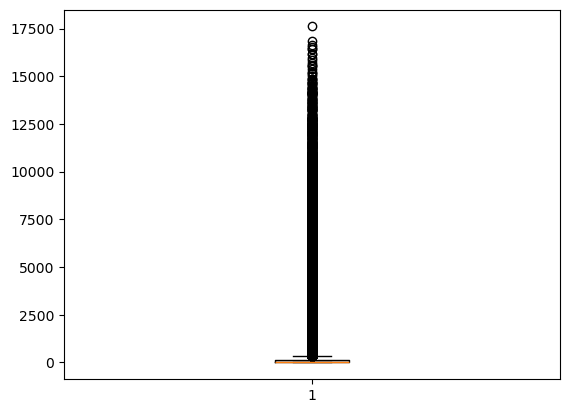

In [112]:
from matplotlib import pyplot as plt
# Для начала посмотрим, как распределяются студенты по количеству ответов на вопросы
# Чтобы не сравнивать тех, кто прошел много тестов, с теми, кто прошел мало
answers_count = train[train.answered_correctly != -1].groupby(by='user_id')['answered_correctly'].count().sort_values(ascending=False).reset_index()
display(answers_count['answered_correctly'].describe())
plt.boxplot(answers_count['answered_correctly'])

**Выводы:**
1. Количество ответов у студентов колеблется от 1 до 16640.
2. При этом среднее значение кол-ва = 255, а медианное = 41
3. Так существует много выбросов в бОльшую сторону
4. 75% студентов отвечали не более чем на 155 вопросов.
5. Вот их и возьмем для анализа.

### 1.3 Сужение выборки от 25% до 75% квантиля
Выделим для дальнейшего анализа студентов, давших от 30 до 154 ответов.

In [114]:
# Вычисляем 25-й и 75-й квартили
Q1 = answers_count['answered_correctly'].quantile(0.25)
Q3 = answers_count['answered_correctly'].quantile(0.75)

# Фильтруем данные
mask1 = answers_count['answered_correctly'] >= Q1
mask2 = answers_count['answered_correctly'] <= Q3
target_users = answers_count[mask1 & mask2]
target_users


,user_id,answered_correctly
98339,1995478574,154
98340,980208986,154
98341,221400647,154
98342,1505728950,154
98343,1757089954,154
...,...,...
297141,1193653157,30
297142,330445760,30
297143,255099685,30
297144,362206193,30


In [115]:
# Выделим из таблицы train только данные пользователей, попавших в эту выборку
# Дальше будем работать с ними
train_s = train[train.user_id.isin(target_users['user_id'])]
train_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11148102 entries, 0 to 101230024
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  bool   
dtypes: bool(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 425.3 MB


In [116]:
# Посмотрим на данные
display(train_s)
display(questions)
display(lectures)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,True
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230020,101230020,55863864,2147481750,9980,0,45,2,1,3000.0,True
101230021,101230021,55884826,2147481750,5528,0,46,2,1,28000.0,True
101230022,101230022,55910967,2147481750,5279,0,47,3,1,14000.0,True
101230023,101230023,55938555,2147481750,5222,0,48,1,0,20000.0,True


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


## 2. Предварительный анализ качества данных
Поскольку таблицы questions и lectures являются справочными таблицами, посмотрим, нет ли выбросов в timestamp-ах таблицы train

In [117]:
# Сравним медианные и средние значения столбцов, во сколько раз одно отличается от другого
print(train_s.timestamp.mean() / train_s.timestamp.median())
print(train_s.prior_question_elapsed_time.mean() / train_s.prior_question_elapsed_time.median())
# Видно отличие в 75 раз для столбца timestamp, что свидетельствует о выбросах
# Отметим что выбросы есть, но ничего сейчас с ними делать не будем
# А вот столбец prior_question_elapsed_time достаточно ровный.

75.83964139408191
1.17204169921875


### 2.1 Анализ пропусков

Пропуски могут значительно повлиять на результат анализа, поэтому важно их выявить и обработать.

In [119]:
# Подсчет пропущенных значений по каждому столбцу
def analyze_missing_values(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Количество пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Количество пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

missing_data = analyze_missing_values(train_s)
missing_data

,Столбцы,Количество пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,305539,2.74


Видим, что пропуски есть только в столбце `prior_question_elapsed_time`. Тк он отражает время, затраченное на решение **предыдущего** пакета вопросов, для первого пакета (когда предыдущего нет) он может принимать значение null, тогда как для последнего пакета вопросов мы не знаем время. Соответственно при анализе `prior_question_elapsed_time` нужно исключать первый и последний пакет вопросов для каждого пользователя.

## 3. Объединение таблиц

In [121]:
# Поскольку у нас данные делятся на вопросные и лекционные,
# разделим таблицу train_s на 2 подтаблицы: train_q и train_l.
# Чтобы корректно объединить их с данными 2 других таблиц
train_q = train_s[train_s.content_type_id == 0]
train_l = train_s[train_s.content_type_id == 1]

In [153]:
# Сведем вместе таблицы train_q и questions
merge_q = train_q.merge(
    questions,
    left_on='content_id',
    right_on='question_id',
    how='left'
)

# Для удобства переименуем столбцы
merge_q = merge_q.rename(columns={"part": "part_q", "tags": "tags_q"})
display(merge_q.head())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part_q,tags_q
0,0,0,115,5692,0,1,3,1,NaN,True,5692,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92


In [154]:
# Сведем вместе таблицы train_l и lectures
merge_l = train_l.merge(
    lectures,
    left_on='content_id',
    right_on='lecture_id',
    how='left'
)
display(merge_l.head())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,117,10183847,5382,16736,1,21,-1,-1,NaN,False,16736,40,1,concept
1,212,1424348597,5382,30207,1,104,-1,-1,NaN,False,30207,43,5,concept
2,216,1425557777,5382,18545,1,121,-1,-1,NaN,False,18545,58,5,concept
3,295,405813029,8623,10540,1,59,-1,-1,NaN,False,10540,99,1,concept
4,302,406265768,8623,25843,1,66,-1,-1,NaN,False,25843,164,1,concept


In [156]:
# Чтобы объединить назад таблицы вопросов и лекций
# приведем их к одной размерности
# и добавим префиксы к одноименным/похожим полям
merge_l[['question_id', 'bundle_id', 'correct_answer', 'part_q', 'tags_q']] = -1
merge_l = merge_l.rename(columns={"part": "part_l", "tag": "tag_l", "type_of": "type_of_l"})
display(merge_l.head())

merge_q[['lecture_id', 'type_of_l', 'part_l', 'tag_l']] = -1
merge_q = merge_q.rename(columns={"part": "part_q", "tags": "tags_q", "type_of": "type_of_l"})
display(merge_q.head())

# Убедимся, что размерность одинакова
print(merge_l.shape[1])
print(merge_q.shape[1])

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag_l,part_l,type_of_l,question_id,bundle_id,correct_answer,part_q,tags_q
0,117,10183847,5382,16736,1,21,-1,-1,NaN,False,16736,40,1,concept,-1,-1,-1,-1,-1
1,212,1424348597,5382,30207,1,104,-1,-1,NaN,False,30207,43,5,concept,-1,-1,-1,-1,-1
2,216,1425557777,5382,18545,1,121,-1,-1,NaN,False,18545,58,5,concept,-1,-1,-1,-1,-1
3,295,405813029,8623,10540,1,59,-1,-1,NaN,False,10540,99,1,concept,-1,-1,-1,-1,-1
4,302,406265768,8623,25843,1,66,-1,-1,NaN,False,25843,164,1,concept,-1,-1,-1,-1,-1


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part_q,tags_q,lecture_id,type_of_l,part_l,tag_l
0,0,0,115,5692,0,1,3,1,NaN,True,5692,5692,3,5,151,-1,-1,-1,-1
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168,-1,-1,-1,-1
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92,-1,-1,-1,-1
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81,-1,-1,-1,-1
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92,-1,-1,-1,-1


19
19


In [157]:
# Объединим таблицы вопросов и лекций назад в одну общую
merged = pd.concat([merge_l, merge_q])
# Столбец content_id уже не нужен (по нему мы добавили столбцы lecture_id и question_id) - удаляем
merged = merged.drop(['content_id'], axis=1)

merged

,row_id,timestamp,user_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag_l,part_l,type_of_l,question_id,bundle_id,correct_answer,part_q,tags_q
0,117,10183847,5382,1,21,-1,-1,NaN,False,16736,40,1,concept,-1,-1,-1,-1,-1
1,212,1424348597,5382,1,104,-1,-1,NaN,False,30207,43,5,concept,-1,-1,-1,-1,-1
2,216,1425557777,5382,1,121,-1,-1,NaN,False,18545,58,5,concept,-1,-1,-1,-1,-1
3,295,405813029,8623,1,59,-1,-1,NaN,False,10540,99,1,concept,-1,-1,-1,-1,-1
4,302,406265768,8623,1,66,-1,-1,NaN,False,25843,164,1,concept,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040879,101230020,55863864,2147481750,0,45,2,1,3000.0,True,-1,-1,-1,-1,9980,9980,2,5,79
11040880,101230021,55884826,2147481750,0,46,2,1,28000.0,True,-1,-1,-1,-1,5528,5528,2,5,14
11040881,101230022,55910967,2147481750,0,47,3,1,14000.0,True,-1,-1,-1,-1,5279,5279,3,5,177
11040882,101230023,55938555,2147481750,0,48,1,0,20000.0,True,-1,-1,-1,-1,5222,5222,2,5,175


In [158]:
# Для удобства анализа преобразуем время (timestamp и prior_question_elapsed_time) в datetime формат
merged['timestamp'] = pd.to_timedelta(merged['timestamp'], unit='ms')
merged['prior_question_elapsed_time'] = pd.to_timedelta(merged['prior_question_elapsed_time'], unit='ms')
merged

,row_id,timestamp,user_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag_l,part_l,type_of_l,question_id,bundle_id,correct_answer,part_q,tags_q
0,117,0 days 02:49:43.847000,5382,1,21,-1,-1,NaT,False,16736,40,1,concept,-1,-1,-1,-1,-1
1,212,16 days 11:39:08.597000,5382,1,104,-1,-1,NaT,False,30207,43,5,concept,-1,-1,-1,-1,-1
2,216,16 days 11:59:17.777000,5382,1,121,-1,-1,NaT,False,18545,58,5,concept,-1,-1,-1,-1,-1
3,295,4 days 16:43:33.029000,8623,1,59,-1,-1,NaT,False,10540,99,1,concept,-1,-1,-1,-1,-1
4,302,4 days 16:51:05.768000,8623,1,66,-1,-1,NaT,False,25843,164,1,concept,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040879,101230020,0 days 15:31:03.864000,2147481750,0,45,2,1,0 days 00:00:03,True,-1,-1,-1,-1,9980,9980,2,5,79
11040880,101230021,0 days 15:31:24.826000,2147481750,0,46,2,1,0 days 00:00:28,True,-1,-1,-1,-1,5528,5528,2,5,14
11040881,101230022,0 days 15:31:50.967000,2147481750,0,47,3,1,0 days 00:00:14,True,-1,-1,-1,-1,5279,5279,3,5,177
11040882,101230023,0 days 15:32:18.555000,2147481750,0,48,1,0,0 days 00:00:20,True,-1,-1,-1,-1,5222,5222,2,5,175


## 4. Анализ данных

In [159]:
# Сколько всего студентов в получившейся выборке?
merged.user_id.nunique()

198807

### 4.1 Выделим лучших и худших студентов


In [229]:
from matplotlib import pyplot as plt

# ТОП-10 лучших студентов по успеваемости (кол-ву правильных ответов)
top_right = merged[merged.answered_correctly == 1].groupby(by='user_id')['answered_correctly'].sum().sort_values(ascending=False).reset_index()
display(top_right.nlargest(10, columns=['answered_correctly', 'user_id']))

,user_id,answered_correctly
0,1733920428,144
1,2091840070,143
2,75903846,139
3,387822161,138
5,2080637911,135
4,808813697,135
7,2099010269,134
6,605646750,134
8,430283532,134
11,1787894639,133


In [196]:
# ТОП-10 лучших студентов по успеваемости (% правильных ответов в числе всех ответов)

# Сгруппируем пользователей по количеству ответов и переименуем колонку с кол-вом ответов на all_answers
all_answers = merged[merged.answered_correctly != -1].groupby(by='user_id')['answered_correctly'].count().sort_values(ascending=False).reset_index()
all_answers = all_answers.rename(columns={"answered_correctly": "all_answers"})

# Добавим (по user_id) в таблицу правильных ответов столбец со всеми ответами пользователей
top_all = top_right.merge(
    all_answers,
    on='user_id',
    how='left'
)

# Добавим столбец % правильных ответов, отсортируем таблицу по нему и выведем ТОП-10
top_all['right_percent'] = round(top_all['answered_correctly'] / top_all['all_answers'] * 100)
top_all.sort_values(by='answered_correctly', ascending=False).iloc[:10,:].sort_values(by='right_percent')

# Видно, что процент правильных ответов у этих ТОП-10 студентов колеблется от 88 до 94%

,user_id,answered_correctly,all_answers,right_percent
5,2080637911,135,153,88.0
6,605646750,134,152,88.0
7,2099010269,134,153,88.0
8,430283532,134,153,88.0
9,1270599604,133,152,88.0
2,75903846,139,153,91.0
3,387822161,138,152,91.0
4,808813697,135,148,91.0
1,2091840070,143,154,93.0
0,1733920428,144,153,94.0


### 4.2 Посмотрим зависимость результатов теста от времени прохождения
В prior_question_elapsed_time указано среднее время ответа на вопрос в каждом bundle. Если мы умножим кол-во вопросов в bundle на это время, мы узнаем время прохождения пользователем одного конкретного bundle.

In [162]:
# Посчитаем число уникальных вопросов в каждом bundle и переименуем столбец question_id в questions (кол-во вопросов)
q_in_bundle = merged.groupby(by='bundle_id')['question_id'].nunique().reset_index()
q_in_bundle = q_in_bundle.rename(columns={"question_id": "questions"})
q_in_bundle

# Получим таблицу с правильными и неправильными ответами
right = merged[merged['answered_correctly'] == 1]
wrong = merged[merged['answered_correctly'] == 0]

# Доп таблица связи bundle и prior_question_elapsed_time - среднее время на 1 вопрос в bundle (по всем пользователям)
time_bundle = right.groupby(by='bundle_id', as_index=False)['prior_question_elapsed_time'].mean()

# Доп таблицы bundle и кол-вом правильных и неправильных ответов в каждом из них
answers_right_bundle = right.groupby(by='bundle_id', as_index=False).agg(a_right=('answered_correctly', 'sum'))
answers_wrong_bundle = wrong.groupby(by='bundle_id', as_index=False).agg(a_wrong=('answered_correctly', 'count'))
answers_all_bundle = merged[merged['answered_correctly'] != -1].groupby(by='bundle_id', as_index=False).agg(a_all=('answered_correctly', 'count'))

# Добавим столбец с данными по ср. времени вопросов в bundle
bundle = q_in_bundle.merge(
    time_bundle,
    on='bundle_id',
    how='left'
)

# Добавим столбец bundle_time - среднее время на весь bundle (по всем пользователям)
bundle['bundle_time'] = bundle['questions'] * bundle['prior_question_elapsed_time']

# Добавим столбцы с количеством ответов
bundle = bundle.merge(
    answers_right_bundle,
    on='bundle_id',
    how='left'
)

bundle = bundle.merge(
    answers_wrong_bundle,
    on='bundle_id',
    how='left'
)

bundle = bundle.merge(
    answers_all_bundle,
    on='bundle_id',
    how='left'
)

# Добавим столбец с процентом правильных ответов на bundle
bundle['a_right_%'] = round(bundle['a_right'] / bundle['a_all'] * 100)

# Уберем ненужные для анализа столбцы и отсортируем по bundle_time по убыванию
res = bundle.drop(['questions', 'prior_question_elapsed_time'], axis=1).sort_values(by='bundle_time', ascending=False)

In [163]:
# Посмотрим по первым 200 bundle c шагом в 10, есть ли зависимость результата от скорости прохождения
res.iloc[:200:10]
# Явной зависимости не видно

,bundle_id,bundle_time,a_right,a_wrong,a_all,a_right_%
5203,7153,0 days 00:05:59.904255315,94.0,96.0,190.0,49.0
5566,8094,0 days 00:04:51.250000,3.0,2.0,5.0,60.0
5234,7270,0 days 00:04:33.027568025,294.0,341.0,635.0,46.0
5209,7168,0 days 00:04:23,1.0,4.0,5.0,20.0
5154,6986,0 days 00:04:15.313377710,1014.0,446.0,1460.0,69.0
5266,7401,0 days 00:04:09.355862360,1177.0,1608.0,2785.0,42.0
5372,7785,0 days 00:04:04.162060130,449.0,371.0,820.0,55.0
5253,7341,0 days 00:03:57.234324510,718.0,392.0,1110.0,65.0
5258,7356,0 days 00:03:52.591558985,356.0,74.0,430.0,83.0
5357,7714,0 days 00:03:43.194020975,143.0,57.0,200.0,72.0


In [164]:
# Вспомним, как выглядят данные в сводной таблице
merged

,row_id,timestamp,user_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag_l,part_l,type_of_l,question_id,bundle_id,correct_answer,part_q,tags_q
0,117,0 days 02:49:43.847000,5382,1,21,-1,-1,NaT,False,16736,40,1,concept,-1,-1,-1,-1,-1
1,212,16 days 11:39:08.597000,5382,1,104,-1,-1,NaT,False,30207,43,5,concept,-1,-1,-1,-1,-1
2,216,16 days 11:59:17.777000,5382,1,121,-1,-1,NaT,False,18545,58,5,concept,-1,-1,-1,-1,-1
3,295,4 days 16:43:33.029000,8623,1,59,-1,-1,NaT,False,10540,99,1,concept,-1,-1,-1,-1,-1
4,302,4 days 16:51:05.768000,8623,1,66,-1,-1,NaT,False,25843,164,1,concept,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040879,101230020,0 days 15:31:03.864000,2147481750,0,45,2,1,0 days 00:00:03,True,-1,-1,-1,-1,9980,9980,2,5,79
11040880,101230021,0 days 15:31:24.826000,2147481750,0,46,2,1,0 days 00:00:28,True,-1,-1,-1,-1,5528,5528,2,5,14
11040881,101230022,0 days 15:31:50.967000,2147481750,0,47,3,1,0 days 00:00:14,True,-1,-1,-1,-1,5279,5279,3,5,177
11040882,101230023,0 days 15:32:18.555000,2147481750,0,48,1,0,0 days 00:00:20,True,-1,-1,-1,-1,5222,5222,2,5,175


Таблица явным образом разделена на тесты и лекции. Сделаем 2 таблицы, сгруппировав данные по user_id

In [220]:
# Таблица по лекциям
lectures = merged[merged['content_type_id'] == 1].groupby(by='user_id').agg(
    lect_container_uniq = ('task_container_id', 'nunique'), # Количество уникальных тем лекций, которые посетил студент
    lect_uniq = ('lecture_id', 'nunique'), # Количество уникальных лекций, которые посетил студент
    lect_tag_uniq = ('tag_l', 'nunique'), # Количество уникальных лекций, которые посетил студент
    lect_part_uniq = ('part_l', 'nunique'), # Количество уникальных лекций, которые посетил студент
    lect_time = ('timestamp', 'sum'), # Сумма потраченного времени
).reset_index()
display(lectures)

,user_id,lect_container_uniq,lect_uniq,lect_tag_uniq,lect_part_uniq,lect_time
0,5382,3,3,3,2,33 days 02:28:10.221000
1,8623,3,3,3,2,16 days 01:58:22.846000
2,40828,1,1,1,1,73 days 19:20:13.807000
3,46886,1,1,1,1,0 days 03:50:51.594000
4,165081,1,1,1,1,7 days 21:21:36.772000
...,...,...,...,...,...,...
53493,2147181987,1,1,1,1,151 days 03:01:42.339000
53494,2147192385,2,2,2,2,28 days 12:42:50.909000
53495,2147194943,1,1,1,1,22 days 07:56:05.320000
53496,2147319667,4,4,4,2,2 days 17:28:28.391000


In [266]:
# Таблица по тестам
tests = merged[merged['content_type_id'] == 0].groupby(by='user_id').agg(
    test_container_uniq = ('task_container_id', 'nunique'), # Количество уникальных task_container_id, которые прошел студент
    test_bundle_uniq = ('bundle_id', 'nunique'), # Количество уникальных bundle_id тестов, которые прошел студент
    test_question_uniq = ('question_id', 'nunique'), # Количество уникальных вопросов, на которые отвечал студент
    test_part_q_uniq = ('part_q', 'nunique'), # Количество уникальных секций TOEIC, которые прошел в тестах студент
    test_answ_all = ('answered_correctly', 'count'), # Сумма всех ответов
    test_answ_right = ('answered_correctly', 'sum'), # Сумма правильных ответов
    test_see_answer = ('prior_question_had_explanation', 'sum') # Сумма просмотров правильных ответов
).reset_index()

In [267]:
# Добавим в tests столбец test_answ_rigth_percent - процент правильных ответов
tests['test_answ_rigth_percent'] = round(tests['test_answ_right'] / tests['test_answ_all'] * 100) # % правильных ответов
display(tests)

,user_id,test_container_uniq,test_bundle_uniq,test_question_uniq,test_part_q_uniq,test_answ_all,test_answ_right,test_see_answer,test_answ_rigth_percent
0,115,42,42,46,5,46,32,7,70.0
1,124,16,16,30,7,30,7,1,23.0
2,5382,125,120,120,3,125,84,114,67.0
3,8623,97,92,104,4,109,70,97,64.0
4,24600,36,36,50,7,50,17,20,34.0
...,...,...,...,...,...,...,...,...,...
198802,2147447441,16,16,30,7,30,11,1,37.0
198803,2147455775,16,16,30,7,30,13,1,43.0
198804,2147457494,39,39,39,3,39,31,30,79.0
198805,2147464207,36,36,50,7,50,21,20,42.0


In [228]:
# Добавим к лекциям столбец test_answ_rigth_percent отражающий успеваемость пользователей
lectures = lectures.merge(
    tests.loc[::, ['user_id', 'test_answ_rigth_percent']],
    on='user_id',
    how='left'
)
display(lectures)

,user_id,lect_container_uniq,lect_uniq,lect_tag_uniq,lect_part_uniq,lect_time,test_answ_rigth_percent
0,5382,3,3,3,2,33 days 02:28:10.221000,67.0
1,8623,3,3,3,2,16 days 01:58:22.846000,64.0
2,40828,1,1,1,1,73 days 19:20:13.807000,63.0
3,46886,1,1,1,1,0 days 03:50:51.594000,61.0
4,165081,1,1,1,1,7 days 21:21:36.772000,63.0
...,...,...,...,...,...,...,...
53493,2147181987,1,1,1,1,151 days 03:01:42.339000,70.0
53494,2147192385,2,2,2,2,28 days 12:42:50.909000,58.0
53495,2147194943,1,1,1,1,22 days 07:56:05.320000,70.0
53496,2147319667,4,4,4,2,2 days 17:28:28.391000,62.0


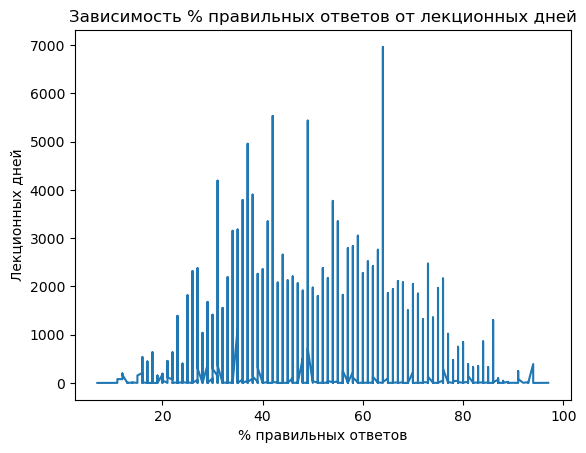

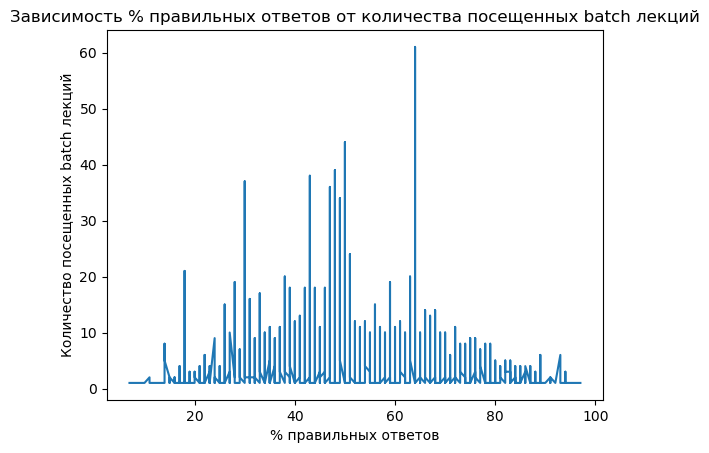

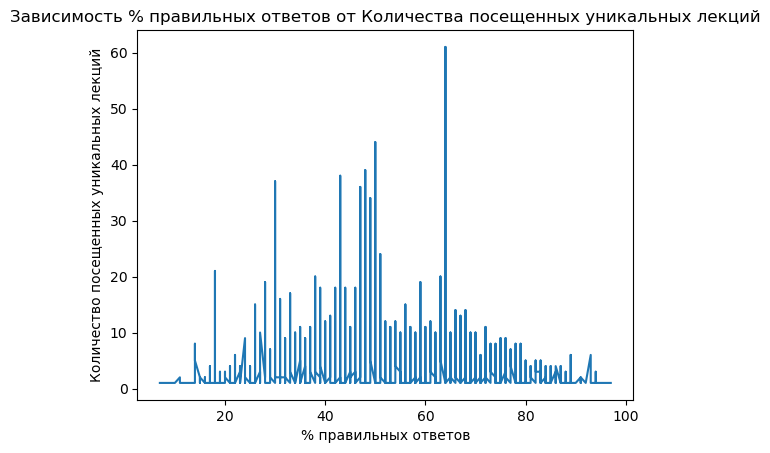

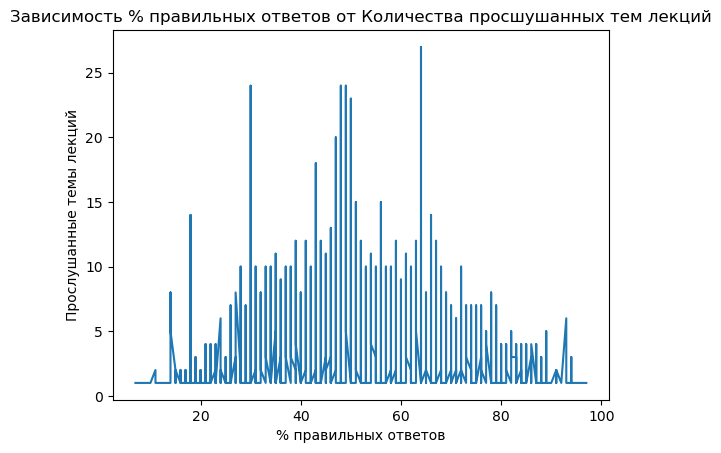

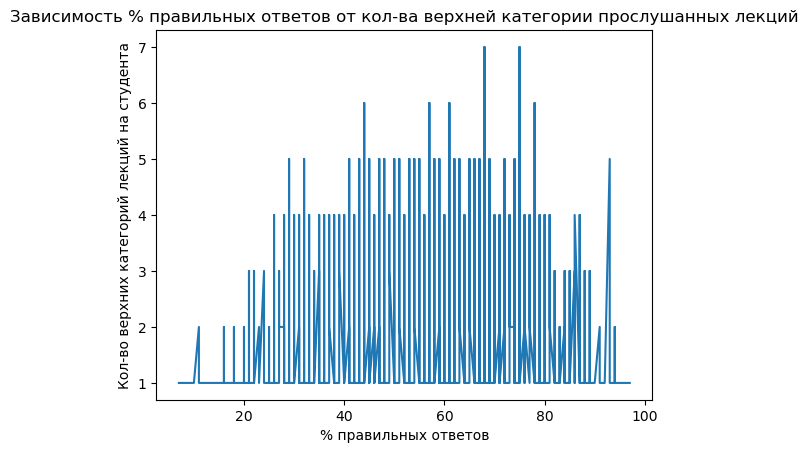

In [248]:
# Отсортируем таблицу по возрастанию test_answ_rigth_percent
lectures = lectures.sort_values(by='test_answ_rigth_percent')

# Отобразим лекционные зависимости успеваемости
# Построим зависимостьtest_answ_rigth_percent от lect_container_uniq, lect_uniq, lect_tag_uniq, lect_part_uniq и числа лекционных дней
x = lectures['test_answ_rigth_percent']

y = lectures['lect_time'].dt.days
y2 = lectures['lect_uniq']
y3 = lectures['lect_tag_uniq']
y4 = lectures['lect_part_uniq']

plt.title('Зависимость % правильных ответов от лекционных дней')
plt.plot(x, lectures['lect_time'].dt.days)
plt.xlabel('% правильных ответов')
plt.ylabel('Лекционных дней')
plt.show()

plt.title('Зависимость % правильных ответов от количества посещенных batch лекций')
plt.plot(x, lectures['lect_container_uniq'])
plt.xlabel('% правильных ответов')
plt.ylabel('Количество посещенных batch лекций')
plt.show()

plt.title('Зависимость % правильных ответов от Количества посещенных уникальных лекций')
plt.plot(x, lectures['lect_uniq'])
plt.xlabel('% правильных ответов')
plt.ylabel('Количество посещенных уникальных лекций')
plt.show()

plt.title('Зависимость % правильных ответов от Количества просшушанных тем лекций')
plt.plot(x, lectures['lect_tag_uniq'])
plt.xlabel('% правильных ответов')
plt.ylabel('Прослушанные темы лекций')
plt.show()

plt.title('Зависимость % правильных ответов от кол-ва верхней категории прослушанных лекций')
plt.plot(x, lectures['lect_part_uniq'])
plt.xlabel('% правильных ответов')
plt.ylabel('Кол-во верхних категорий лекций на студента')
plt.show()

### Обзорные выводы по успеваемости в зависимости от кол-ва посещенных лекций:
1. Чем меньше лекций посещал студент, тем хуже успеваемость.
2. Студенты со средней успеваемостью посещали много лекций.
3. Есть категория студентов-гениев, которые имели высокую успеваемость, не смотря на плохую посещаемость лекций.

### Проверим зависимость успеваемости от кол-ва пройденных тестов

In [271]:
# Сгруппируем таблицу тестов по количеству отвеченных вопросов, усреднив в каждом % правильных ответов
tests_count = tests.groupby(by='test_answ_all')['test_answ_rigth_percent'].mean().reset_index()

# Отсортируем по убыванию и возьмем каждую 10 строку, чтобы охватить весь диапазон
tests_count.sort_values(by='test_answ_all', ascending=False)[::10]

,test_answ_all,test_answ_rigth_percent
124,154,61.820000
114,144,62.070886
104,134,60.916854
94,124,61.628337
84,114,61.839319
74,104,60.516556
64,94,60.209653
54,84,58.181941
44,74,57.185729
34,64,56.314286


**Вывод** - чем больше тестов проходил студент, тем чаще он начинал отвечать правильно

### Проверим зависимость успеваемости от кол-ва просмотров правильных ответов

In [272]:
# Сгруппируем таблицу тестов по количеству просмотров ответов, усреднив в каждом % правильных ответов
tests_count = tests.groupby(by='test_see_answer')['test_answ_rigth_percent'].mean().reset_index()

# Отсортируем по убыванию и возьмем каждую 10 строку, чтобы охватить весь диапазон
tests_count.sort_values(by='test_see_answer', ascending=False)[::10]

,test_see_answer,test_answ_rigth_percent
154,154,69.666667
144,144,62.580838
134,134,62.612100
124,124,62.397368
114,114,61.429213
104,104,61.727440
94,94,61.000000
84,84,62.141457
74,74,60.023529
64,64,59.420066


In [274]:
merged

,row_id,timestamp,user_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag_l,part_l,type_of_l,question_id,bundle_id,correct_answer,part_q,tags_q
0,117,0 days 02:49:43.847000,5382,1,21,-1,-1,NaT,False,16736,40,1,concept,-1,-1,-1,-1,-1
1,212,16 days 11:39:08.597000,5382,1,104,-1,-1,NaT,False,30207,43,5,concept,-1,-1,-1,-1,-1
2,216,16 days 11:59:17.777000,5382,1,121,-1,-1,NaT,False,18545,58,5,concept,-1,-1,-1,-1,-1
3,295,4 days 16:43:33.029000,8623,1,59,-1,-1,NaT,False,10540,99,1,concept,-1,-1,-1,-1,-1
4,302,4 days 16:51:05.768000,8623,1,66,-1,-1,NaT,False,25843,164,1,concept,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040879,101230020,0 days 15:31:03.864000,2147481750,0,45,2,1,0 days 00:00:03,True,-1,-1,-1,-1,9980,9980,2,5,79
11040880,101230021,0 days 15:31:24.826000,2147481750,0,46,2,1,0 days 00:00:28,True,-1,-1,-1,-1,5528,5528,2,5,14
11040881,101230022,0 days 15:31:50.967000,2147481750,0,47,3,1,0 days 00:00:14,True,-1,-1,-1,-1,5279,5279,3,5,177
11040882,101230023,0 days 15:32:18.555000,2147481750,0,48,1,0,0 days 00:00:20,True,-1,-1,-1,-1,5222,5222,2,5,175


**Вывод** - есть зависимость между успеваемостью студента и тем, как часто он смотрит правильные ответы на вопросы и пояснения

### Дополнительные векторы для анализа:
1. Выявить, какие из тематик тестов, групп вопросов, тегов вопросов и самих вопросов были наиболее простыми для студентов (% правильных ответов выше)
2. Посмотреть влияние участия в определенных типах/тематиках лекций на % правильных ответов
3. Сгруппировать лекции/тесты по тегам и посчитать для каждого тега % правильных ответов